# "1- NLP with Classification and Vector Spaces"
> "Procesamiento del lenguaje natural"

- toc: true
- branch: master
- badges: true
- comments: true
- categories: [python, NLP, ML]
- image: images/framework.jpg
- hide: false
- search_exclude: true
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2

Fuentes:
[Coursera: Programa especializado: Procesamiento de lenguaje natural](https://www.coursera.org/specializations/natural-language-processing) 

# 1.1- Sentiment Analysis with Logistic Regression

## Preprocessing

In [31]:
import nltk                                # Python library for NLP
from nltk.corpus import twitter_samples   # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt            # library for visualization
import random                            # pseudo-random number generator
import numpy as np      

In [21]:
# downloads sample twitter dataset.
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\juan_\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [5]:
# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

In [6]:
print('Number of positive tweets: ', len(all_positive_tweets))
print('Number of negative tweets: ', len(all_negative_tweets))

print('\nThe type of all_positive_tweets is: ', type(all_positive_tweets))
print('The type of a tweet entry is: ', type(all_negative_tweets[0]))

Number of positive tweets:  5000
Number of negative tweets:  5000

The type of all_positive_tweets is:  <class 'list'>
The type of a tweet entry is:  <class 'str'>


In [9]:
# print positive in greeen
print('\033[92m' + all_positive_tweets[random.randint(0,5000)])

# print negative in red
print('\033[91m' + all_negative_tweets[random.randint(0,5000)])

[ Singles &amp; Dating ] Open Question : How can I start and keep a long and happy long-distance relationship?: Hi :) last week I was in a…
Hate when I can't remember my dreams, I love sharing them :(


In [10]:
# download the stopwords from NLTK
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\juan_\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [11]:
import re                                  # library for regular expression operations
import string                              # for string operations

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

**Remove hyperlinks, Twitter marks and styles**

In [12]:
tweet = all_positive_tweets[2277]
print('\033[92m' + tweet)
print('\033[94m')

# remove old style retweet text "RT"
tweet2 = re.sub(r'^RT[\s]+', '', tweet)

# remove hyperlinks
tweet2 = re.sub(r'https?://[^\s\n\r]+', '', tweet2)

# remove hashtags
# only removing the hash # sign from the word
tweet2 = re.sub(r'#', '', tweet2)

print(tweet2)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


**Tokenize the string**

In [14]:
# instantiate tokenizer class
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
# tokenize tweets
tweet_tokens = tokenizer.tokenize(tweet2)

print(tweet_tokens)

['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


**Remove stop words and punctuations**

In [22]:
#Import the english stop words list from NLTK
stopwords_english = stopwords.words('english') 

print('Stop words\n')
print(stopwords_english)

print('\nPunctuation\n')
print(string.punctuation)

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

In [23]:
tweets_clean = []

for word in tweet_tokens: # Go through every word in your tokens list
    if (word not in stopwords_english and  # remove stopwords
        word not in string.punctuation):  # remove punctuation
        tweets_clean.append(word)

print('removed stop words and punctuation:')
print(tweets_clean)

removed stop words and punctuation:
['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']


**Stemming** : the process of converting a word to its most general form, or stem. 

In [24]:
# Instantiate stemming class
stemmer = PorterStemmer() 

# Create an empty list to store the stems
tweets_stem = [] 

for word in tweets_clean:
    stem_word = stemmer.stem(word)  # stemming word
    tweets_stem.append(stem_word)  # append to the list

print('stemmed words:')
print(tweets_stem)

stemmed words:
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


**Convert all words to lower case** 

## Feature Extraction

Logistic regression classifier: In supervised machine learning, you usually have an input X, which goes into your prediction function to get your Y'. You can then compare your prediction with the true value Y. This gives you your cost which you use to update the parameters θ. The following image, summarizes the process. 

![](images/nlp001.png)

Sentiment analysis on a tweet:
- X -the text (i.e. "I am happy because I am learning NLP ") as features
- Train 
- Classify the text.

Vocabulary = V (1..n): set of unique words
Feature Extraction: 1 in the corresponding index for any word in the tweet, and a 0 otherwise. 

![](images/nlp002.png)

As V gets larger, the vector becomes more sparse.
Sparse representations are problematic for training and prediction times.

**Feature Extraction with Frequencies**
-  Divide tweet corpus into two classes: positive and negative
-  Count each time each word appears in either class

![](images/nlp003.png)

 Feature vector [1,8,11]. 1 corresponds to the bias, 8 the positive feature, and 11 the negative feature. 

![](images/nlp004.png)

In [39]:
def process_tweet(tweet):
    """Process tweet.
    Input:
        tweet
       
    Output:
        tweet processed
    """
    tweet2 = re.sub(r'^RT[\s]+', '', tweet)
    tweet2 = re.sub(r'https?://[^\s\n\r]+', '', tweet2)
    tweet2 = re.sub(r'#', '', tweet2)
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)   
    tweet_tokens = tokenizer.tokenize(tweet2)
    tweets_clean = []

    for word in tweet_tokens: # Go through every word in your tokens list
        if (word not in stopwords_english and  # remove stopwords
            word not in string.punctuation):  # remove punctuation
            tweets_clean.append(word)
    stemmer = PorterStemmer() 
    tweets_stem = [] 
    for word in tweets_clean:
        stem_word = stemmer.stem(word)  # stemming word
        tweets_stem.append(stem_word)  # append to the list
    tweets_processed = [] 
    for word in tweets_stem:
        processed_word = word.lower()  # stemming word
        tweets_processed.append(processed_word)  # append to the list
    return tweets_processed

In [40]:
def build_freqs(tweets, ys):
    """Build frequencies.
    Input:
        tweets: a list of tweets
        ys: an m x 1 array with the sentiment label of each tweet
            (either 0 or 1)
    Output:
        freqs: a dictionary mapping each (word, sentiment) pair to its
        frequency
    """
    # Convert np array to list since zip needs an iterable.
    # The squeeze is necessary or the list ends up with one element.
    # Also note that this is just a NOP if ys is already a list.
    yslist = np.squeeze(ys).tolist()

    # Start with an empty dictionary and populate it by looping over all tweets
    # and over all processed words in each tweet.
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1    
    return freqs

In [41]:
# concatenate the lists, 1st part is the positive tweets followed by the negative
tweets = all_positive_tweets + all_negative_tweets
# make a numpy array representing labels of the tweets
labels = np.append(np.ones((len(all_positive_tweets))), np.zeros((len(all_negative_tweets))))

In [42]:
# create frequency dictionary
freqs = build_freqs(tweets, labels)

# check data type
print(f'type(freqs) = {type(freqs)}')

# check length of the dictionary
print(f'len(freqs) = {len(freqs)}')

type(freqs) = <class 'dict'>
len(freqs) = 13172


In [43]:
tweet = all_positive_tweets[2277]
print(process_tweet(tweet))

['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


In [ ]:
print(freqs)

## Table of word counts

In [48]:
# select some words to appear in the report. we will assume that each word is unique (i.e. no duplicates)
keys = ['happi', 'merri', 'nice', 'good', 'bad', 'sad', 'mad', 'best', 'pretti',
        '❤', ':)', ':(', '😒', '😬', '😄', '😍', '♛',
        'song', 'idea', 'power', 'play', 'magnific']


# list representing our table of word counts.
# each element consist of a sublist with this pattern: [<word>, <positive_count>, <negative_count>]
data = []

# loop through our selected words
#for word in tweets:  # keys
 
for tweet in tweets:
    for word in process_tweet(tweet):

         # initialize positive and negative counts
        pos = 0
        neg = 0

        # retrieve number of positive counts
        if (word, 1) in freqs:
            pos = freqs[(word, 1)]

        # retrieve number of negative counts
        if (word, 0) in freqs:
            neg = freqs[(word, 0)]

        # append the word counts to the table
        data.append([word, pos, neg])
    
data

[['followfriday', 25, 0],
 ['top', 32, 6],
 ['engag', 7, 0],
 ['member', 16, 6],
 ['commun', 33, 2],
 ['week', 83, 56],
 [':)', 3691, 2],
 ['hey', 77, 26],
 ['jame', 7, 4],
 ['odd', 2, 3],
 [':/', 5, 11],
 ['pleas', 99, 275],
 ['call', 37, 29],
 ['contact', 7, 7],
 ['centr', 2, 2],
 ['02392441234', 1, 0],
 ['abl', 8, 23],
 ['assist', 1, 0],
 [':)', 3691, 2],
 ['mani', 33, 29],
 ['thank', 643, 107],
 ['listen', 17, 18],
 ['last', 47, 73],
 ['night', 68, 46],
 [':)', 3691, 2],
 ['bleed', 2, 1],
 ['amaz', 51, 16],
 ['track', 5, 3],
 ['scotland', 2, 2],
 ['congrat', 21, 2],
 [':)', 3691, 2],
 ['yeaaah', 1, 0],
 ['yipppi', 1, 0],
 ['accnt', 2, 0],
 ['verifi', 2, 0],
 ['rqst', 1, 0],
 ['succeed', 1, 0],
 ['got', 69, 104],
 ['blue', 9, 5],
 ['tick', 1, 0],
 ['mark', 1, 2],
 ['fb', 6, 7],
 ['profil', 2, 1],
 [':)', 3691, 2],
 ['15', 5, 10],
 ['day', 246, 150],
 ['one', 131, 149],
 ['irresist', 2, 0],
 [':)', 3691, 2],
 ['flipkartfashionfriday', 17, 0],
 ['like', 233, 228],
 ['keep', 68, 34],
 

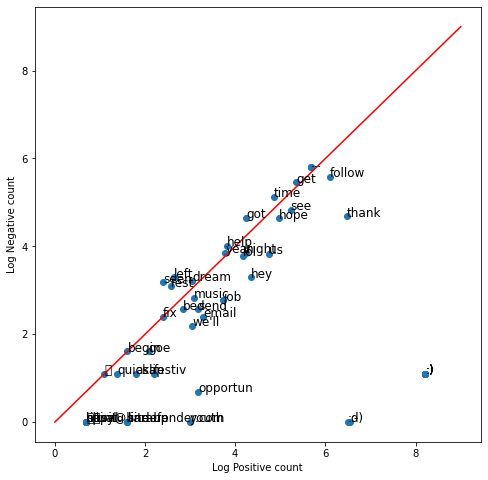

In [54]:
data1= data[200:250]
fig, ax = plt.subplots(figsize = (8, 8))

# convert positive raw counts to logarithmic scale. we add 1 to avoid log(0)
x = np.log([x[1] + 1 for x in data1])  

# do the same for the negative counts
y = np.log([x[2] + 1 for x in data1]) 

# Plot a dot for each pair of words
ax.scatter(x, y)  

# assign axis labels
plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

# Add the word as the label at the same position as you added the points just before
for i in range(0, len(data1)):
    ax.annotate(data1[i][0], (x[i], y[i]), fontsize=12)

ax.plot([0, 9], [0, 9], color = 'red') # Plot the red line that divides the 2 areas.
plt.show()

In [50]:
data[:20]

[['followfriday', 25, 0],
 ['top', 32, 6],
 ['engag', 7, 0],
 ['member', 16, 6],
 ['commun', 33, 2],
 ['week', 83, 56],
 [':)', 3691, 2],
 ['hey', 77, 26],
 ['jame', 7, 4],
 ['odd', 2, 3],
 [':/', 5, 11],
 ['pleas', 99, 275],
 ['call', 37, 29],
 ['contact', 7, 7],
 ['centr', 2, 2],
 ['02392441234', 1, 0],
 ['abl', 8, 23],
 ['assist', 1, 0],
 [':)', 3691, 2],
 ['mani', 33, 29]]

## Logistic Regression

**Sigmoid function**

![](images/nlp005.png)

**Gradient**

![](images/nlp009.png)

**Cost Function**

![](images/nlp008.png)

**Train**

![](images/nlp006.png)

### Test

![](images/nlp007.png)